In [ ]:

SQL

Use MySQL or PyMySQL to perform the below queries. 

Note: Use only the cleaned data for SQL part of the project


Find the number of corona patients who faced shortness of breath.

Find the number of negative corona patients who have fever and sore_throat. 

Group the data by month and rank the number of positive cases.

Find the female negative corona patients who faced cough and headache.

How many elderly corona patients have faced breathing problems?

Which three symptoms were more common among COVID positive patients?

Which symptom was less common among COVID negative people?

What are the most common symptoms among COVID positive males whose known contact was abroad? 


## Imporatnce of the Project
The COVID-19 pandemic has had a significant impact on the world and it's critical to address it effectively. A COVID-19 proposal can provide solutions to the challenges posed by the pandemic, such as controlling its spread, providing medical care to those affected, protecting the vulnerable, and mitigating its economic and social consequences. The proposals can also help governments, organizations, and communities in their efforts to manage and overcome the pandemic effectively. 
Accurate disease prediction can lead to improved patient outcomes and better management of healthcare resources in terms of early diagnosis, Personalised Treatment, Resource Allocation and Disease Preventation

### Dataset Description
Dataset contails symptoms of patients which is crucial to identify the infection of covid. Columns are categorical in nature.
Details of the columns are :
*  ID (Individual ID)

* Sex (male/female). 

* Age ≥60 above years (true/false) 

* Test date (date when tested for COVID)

* Cough (true/false).

* Fever (true/false). 

* Sore throat (true/false). 
* Shortness of breath (true/false). 

* Headache (true/false). 
* Known contact with an individual confirmed to have COVID-19 (true/false).
* Corona positive or negative



In [1]:
# importing necessary libraries
import numpy
import pandas
import seaborn
import matplotlib.pyplot as plt

from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.model_selection import train_test_split


from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn import svm
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_auc_score,classification_report

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
#uploading the dataset
covid = pandas.read_csv('corona_tested_006.csv')

In [4]:
covid.shape

(278848, 11)

In [5]:
#making a copy
covid_data = covid.copy(deep=True)

In [6]:
#first 5 rows
covid_data.head()

,Ind_ID,Test_date,Cough_symptoms,Fever,Sore_throat,Shortness_of_breath,Headache,Corona,Age_60_above,Sex,Known_contact
0,1,11-03-2020,TRUE,FALSE,TRUE,FALSE,FALSE,negative,None,None,Abroad
1,2,11-03-2020,FALSE,TRUE,FALSE,FALSE,FALSE,positive,None,None,Abroad
2,3,11-03-2020,FALSE,TRUE,FALSE,FALSE,FALSE,positive,None,None,Abroad
3,4,11-03-2020,TRUE,FALSE,FALSE,FALSE,FALSE,negative,None,None,Abroad
4,5,11-03-2020,TRUE,FALSE,FALSE,FALSE,FALSE,negative,None,None,Contact with confirmed


In [7]:
# checking for null values
covid_data.isnull().sum()

Ind_ID                 0
Test_date              0
Cough_symptoms         0
Fever                  0
Sore_throat            0
Shortness_of_breath    0
Headache               0
Corona                 0
Age_60_above           0
Sex                    0
Known_contact          0
dtype: int64

There is zero null values showing.
Exploring more to detect any unusual data.

In [8]:
covid_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 278848 entries, 0 to 278847
Data columns (total 11 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   Ind_ID               278848 non-null  int64 
 1   Test_date            278848 non-null  object
 2   Cough_symptoms       278848 non-null  object
 3   Fever                278848 non-null  object
 4   Sore_throat          278848 non-null  object
 5   Shortness_of_breath  278848 non-null  object
 6   Headache             278848 non-null  object
 7   Corona               278848 non-null  object
 8   Age_60_above         278848 non-null  object
 9   Sex                  278848 non-null  object
 10  Known_contact        278848 non-null  object
dtypes: int64(1), object(10)
memory usage: 23.4+ MB


In [10]:
# renaming a column
covid_data = covid_data.rename(columns={'Sex':'Gender'})

In [11]:
print("Cough_symptoms has ")
print(covid_data['Cough_symptoms'].value_counts())
print("\n")

print("Fever has ")
print(covid_data['Fever'].value_counts())
print("\n")

print("Sore_throat has ")
print(covid_data['Sore_throat'].value_counts())
print("\n")

print("Shortness_of_breath has ")
print(covid_data['Shortness_of_breath'].value_counts())
print("\n")

print("Headache has ")
print(covid_data['Headache'].value_counts())
print("\n")

print("Corona has ")
print(covid_data['Corona'].value_counts())
print("\n")

print("Age_60_above has ")
print(covid_data['Age_60_above'].value_counts())
print("\n")

print("Gender has ")
print(covid_data['Gender'].value_counts())
print("\n")

print("Known_contact has ")
print(covid_data['Known_contact'].value_counts())
print("\n")


Cough_symptoms has 
False    127531
FALSE    108837
TRUE      21983
True      20245
None        252
Name: Cough_symptoms, dtype: int64


Fever has 
False    137774
FALSE    119070
TRUE      11750
True      10002
None        252
Name: Fever, dtype: int64


Sore_throat has 
False    212584
FALSE     64337
TRUE       1198
True        728
None          1
Name: Sore_throat, dtype: int64


Shortness_of_breath has 
False    212842
FALSE     64428
TRUE       1107
True        470
None          1
Name: Shortness_of_breath, dtype: int64


Headache has 
False    212326
FALSE     64107
TRUE       1428
True        986
None          1
Name: Headache, dtype: int64


Corona has 
negative    260227
positive     14729
other         3892
Name: Corona, dtype: int64


Age_60_above has 
None    127320
No      125703
Yes      25825
Name: Age_60_above, dtype: int64


Gender has 
female    130158
male      129127
None       19563
Name: Gender, dtype: int64


Known_contact has 
Other                     242741
A

As seen above, most of the column has 'True' and 'TRUE' which needs to considered as same.

In [13]:
# Defining a function
def convert(x):
    if x == True:
        return 'true'
    elif x == False:
        return 'false'
    elif x == 'TRUE':
        return x.lower()
    elif x == 'FALSE':
        return x.lower()
    else:
        return x

In [16]:
# applying the defined function
covid_data['Cough_symptoms'] = covid_data['Cough_symptoms'].map(convert)
covid_data['Fever'] = covid_data['Fever'].map(convert)
covid_data['Sore_throat'] = covid_data['Sore_throat'].map(convert)
covid_data['Shortness_of_breath'] = covid_data['Shortness_of_breath'].map(convert)
covid_data['Headache'] = covid_data['Headache'].map(convert)

In [17]:
covid_data

,Ind_ID,Test_date,Cough_symptoms,Fever,Sore_throat,Shortness_of_breath,Headache,Corona,Age_60_above,Gender,Known_contact
0,1,11-03-2020,true,false,true,false,false,negative,None,None,Abroad
1,2,11-03-2020,false,true,false,false,false,positive,None,None,Abroad
2,3,11-03-2020,false,true,false,false,false,positive,None,None,Abroad
3,4,11-03-2020,true,false,false,false,false,negative,None,None,Abroad
4,5,11-03-2020,true,false,false,false,false,negative,None,None,Contact with confirmed
...,...,...,...,...,...,...,...,...,...,...,...
278843,278844,30-04-2020,false,false,false,false,false,positive,None,male,Other
278844,278845,30-04-2020,false,false,false,false,false,negative,None,female,Other
278845,278846,30-04-2020,false,false,false,false,false,negative,None,male,Other
278846,278847,30-04-2020,false,false,false,false,false,negative,None,male,Other


In [20]:
for i in covid_data.columns:
    print(covid_data[i].value_counts())
    print()

1         1
185898    1
185904    1
185903    1
185902    1
         ..
92955     1
92956     1
92957     1
92958     1
278848    1
Name: Ind_ID, Length: 278848, dtype: int64
20-04-2020    10921
19-04-2020    10199
22-04-2020     9646
21-04-2020     9624
16-04-2020     9138
23-04-2020     8744
01-04-2020     8654
13-04-2020     8425
02-04-2020     8188
03-04-2020     8079
17-04-2020     7645
05-04-2020     7509
30-04-2020     7313
27-04-2020     7304
15-04-2020     7149
31-03-2020     7134
24-04-2020     7028
26-03-2020     6663
14-04-2020     6571
28-04-2020     6334
18-04-2020     6321
26-04-2020     6131
12-04-2020     5984
27-03-2020     5963
07-04-2020     5931
30-03-2020     5915
10-04-2020     5678
28-03-2020     5602
25-03-2020     5495
06-04-2020     5368
29-03-2020     5277
04-04-2020     5145
25-04-2020     5052
24-03-2020     4735
09-04-2020     4539
11-04-2020     4341
29-04-2020     4259
08-04-2020     4058
22-03-2020     3565
23-03-2020     3494
19-03-2020     2243
18-03

In [15]:
#replacing None and other with nan
covid_data = covid_data.replace('None',numpy.nan)
covid_data = covid_data.replace('other',numpy.nan)
#covid_data = covid_data.replace('Other',numpy.nan)
covid_data.head()

,Ind_ID,Test_date,Cough_symptoms,Fever,Sore_throat,Shortness_of_breath,Headache,Corona,Age_60_above,Gender,Known_contact
0,1,11-03-2020,true,false,true,false,false,negative,NaN,NaN,Abroad
1,2,11-03-2020,false,true,false,false,false,positive,NaN,NaN,Abroad
2,3,11-03-2020,false,true,false,false,false,positive,NaN,NaN,Abroad
3,4,11-03-2020,true,false,false,false,false,negative,NaN,NaN,Abroad
4,5,11-03-2020,true,false,false,false,false,negative,NaN,NaN,Contact with confirmed


In [16]:
covid_data.isna().sum()

Ind_ID                      0
Test_date                   0
Cough_symptoms            252
Fever                     252
Sore_throat                 1
Shortness_of_breath         1
Headache                    1
Corona                   3892
Age_60_above           127320
Gender                  19563
Known_contact               0
dtype: int64

In [17]:
print(f"Cough_symptoms : {round(covid_data['Cough_symptoms'].isnull().sum()*100/covid_data.shape[0],5)} % nan")
print(f"Fever : {round(covid_data['Fever'].isnull().sum()*100/covid_data.shape[0],5)} % nan")
print(f"Sore_throat : {round(covid_data['Sore_throat'].isnull().sum()*100/covid_data.shape[0],5)} % nan")
print(f"Shortness_of_breath : {round(covid_data['Shortness_of_breath'].isnull().sum()*100/covid_data.shape[0],5)} % nan")
print(f"Headache : {round(covid_data['Headache'].isnull().sum()*100/covid_data.shape[0],5)} % nan")
print(f"Age_60_above : {round(covid_data['Age_60_above'].isnull().sum()*100/covid_data.shape[0],5)} % nan")
print(f"Gender : {round(covid_data['Gender'].isnull().sum()*100/covid_data.shape[0],5)} % nan")
print(f"Known_contact : {round(covid_data['Known_contact'][covid_data['Known_contact'] == 'Other'].count()*100/covid_data.shape[0],2)} % nan")


Cough_symptoms : 0.09037 % nan
Fever : 0.09037 % nan
Sore_throat : 0.00036 % nan
Shortness_of_breath : 0.00036 % nan
Headache : 0.00036 % nan
Age_60_above : 45.65928 % nan
Gender : 7.01565 % nan
Known_contact : 87.05 % nan


Since Age_60_above and known_contact has higher missing value so we need to drop these column

In [18]:
covid_data = covid_data.drop('Known_contact',axis=1)
covid_data = covid_data.drop(['Age_60_above','Ind_ID'],axis=1)
covid_data.isna().sum()

Test_date                  0
Cough_symptoms           252
Fever                    252
Sore_throat                1
Shortness_of_breath        1
Headache                   1
Corona                  3892
Gender                 19563
dtype: int64

In [19]:
# removing rows with missing data less than 1 % 
covid_data = covid_data.dropna(subset = ['Cough_symptoms','Fever','Sore_throat','Shortness_of_breath','Headache','Corona'])

In [20]:
covid_data.isnull().sum()

Test_date                  0
Cough_symptoms             0
Fever                      0
Sore_throat                0
Shortness_of_breath        0
Headache                   0
Corona                     0
Gender                 19034
dtype: int64

In [21]:
# imputing missing value 
covid_data.fillna(method = 'bfill',inplace = True)

### EDA

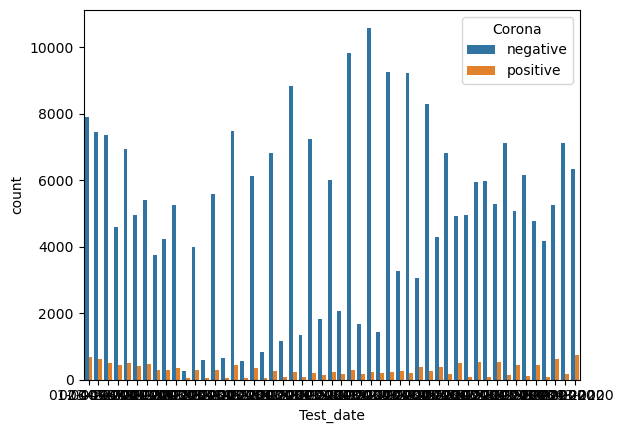

In [22]:
seaborn.countplot(x='Test_date', hue='Corona', data=covid_data)
plt.show()

As number of testing increased, the infection rate reduced.

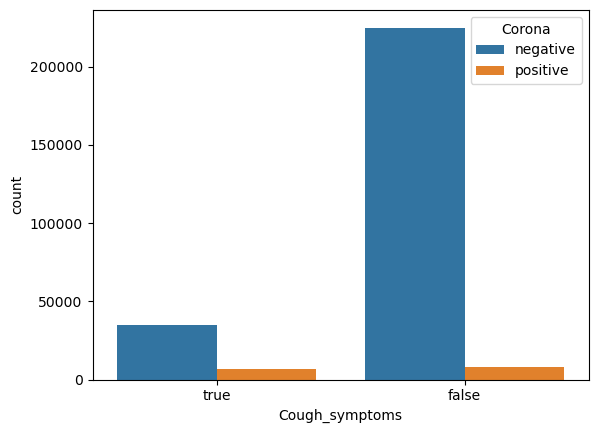

In [23]:
seaborn.countplot(x='Cough_symptoms', hue='Corona', data=covid_data)
plt.show()

People having cough symptoms are less likely to be covid negative

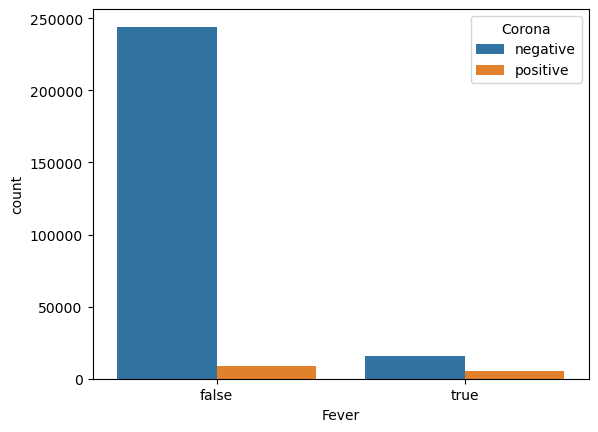

In [24]:
seaborn.countplot(x='Fever', hue='Corona', data=covid_data)
plt.show()

People having fever symptoms are very less likely to be covid negative

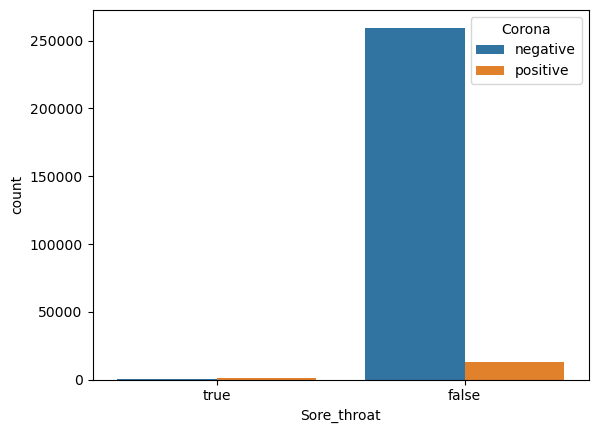

In [25]:
seaborn.countplot(x='Sore_throat', hue='Corona', data=covid_data)
plt.show()

Very few patients have sore throat and they are highly prone to covid positive.

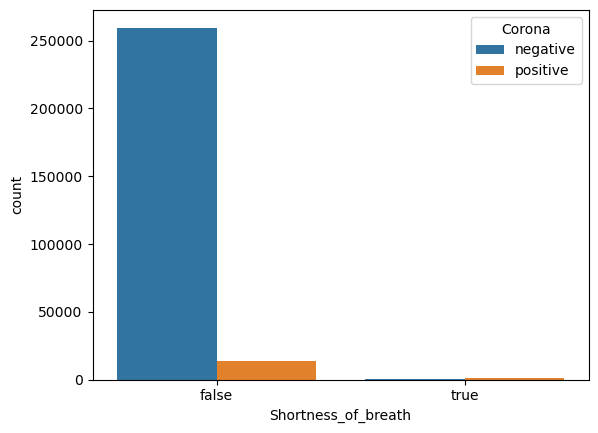

In [26]:
seaborn.countplot(x='Shortness_of_breath', hue='Corona', data=covid_data)
plt.show()

Similar to sore throat, Shortness of breath is also a symptom to identify the covid patients easily.

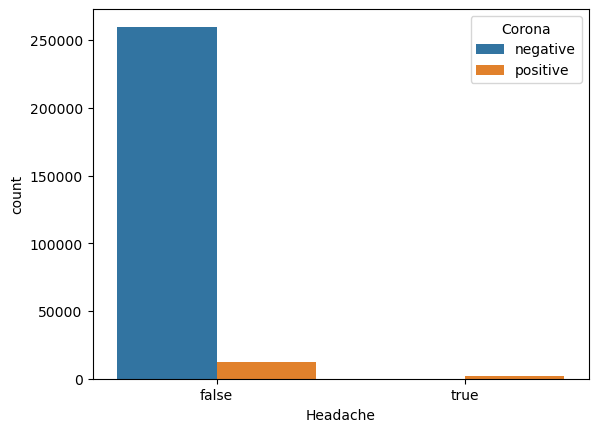

In [27]:
seaborn.countplot(x='Headache', hue='Corona', data=covid_data)
plt.show()

Just a few patients have this symtom but they are highly prone to be postive.

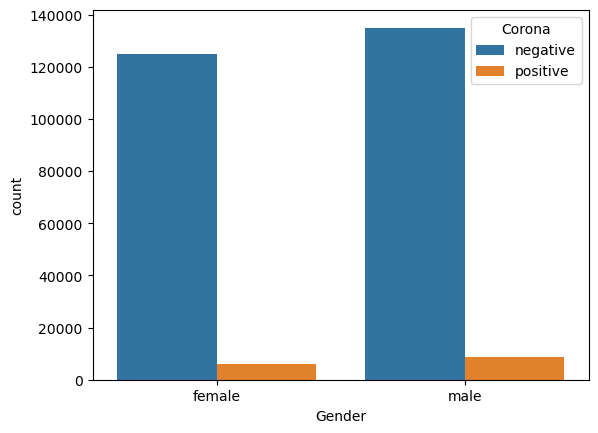

In [28]:
seaborn.countplot(x='Gender', hue='Corona', data=covid_data)
plt.show()

**Gender does not have considerable affect on being covid positive or negative.**

In [29]:
#encoding the categorical data
covid_data.drop('Test_date',axis=1,inplace = True)
encoded = pandas.get_dummies(covid_data,drop_first =True)

In [30]:
encoded = encoded.astype('category')

### Important Feature Selecton 

In [31]:
 # Separating the feature and target

X = encoded.drop('Corona_positive', axis=1)
y = encoded['Corona_positive']

In [32]:
# CHI2 method to select top 5 features

selector = SelectKBest(score_func=chi2, k=5)
X_new = selector.fit_transform(X, y)

# masking the Boolean array indicating the status of each feature
mask = selector.get_support()

# convert the Boolean array to a list of indices
selected_feature_indices = mask.nonzero()[0]

# use the indices to get the names of the selected features
selected_feature_names = X.columns[selected_feature_indices]
selected_feature_names

Index(['Cough_symptoms_true', 'Fever_true', 'Sore_throat_true',
       'Shortness_of_breath_true', 'Headache_true'],
      dtype='object')

In [33]:
# removing less important feature
feature_data = encoded.drop('Gender_male',axis = True)

In [34]:
# separating features and target for train test split
features = feature_data.drop('Corona_positive',axis = True)
target = feature_data['Corona_positive']

### Model Creation

**1. Logistic Regression**

In [67]:
# splitting the dataset
x_train, x_test, y_train, y_test = train_test_split(features,target,train_size = 0.75, random_state = 42)
logistic_regression = LogisticRegression(solver='lbfgs', multi_class='auto',random_state = 42)
logistic_regression.fit(x_train, y_train)

y_train_lr = logistic_regression.predict(x_train)
y_pred_lr = logistic_regression.predict(x_test)

acc_train_lr = accuracy_score(y_train,y_train_lr)
print('accuracy_score for training logistic regression is ',acc_train_lr)

accuracy_score for training logistic regression is  0.956714201120247


In [68]:
acc_logistic = accuracy_score(y_test, y_pred_lr)
prec_logistic = precision_score(y_test, y_pred_lr)
recall_logistic = recall_score(y_test, y_pred_lr)
f1_logistic = f1_score(y_test, y_pred_lr)
conf_mat_lr = confusion_matrix(y_test, y_pred_lr)

print('confusion_matrix: \n ',conf_mat_lr)

confusion_matrix: 
  [[64894   159]
 [ 2770   853]]


In [69]:
print(acc_logistic)
print(prec_logistic)
print(recall_logistic)
print(f1_logistic)

0.957350457219407
0.8428853754940712
0.2354402428926304
0.3680690399137001


In [70]:
class_report_lg = classification_report(y_test,y_pred_lr)
print(class_report_lg)

              precision    recall  f1-score   support

           0       0.96      1.00      0.98     65053
           1       0.84      0.24      0.37      3623

    accuracy                           0.96     68676
   macro avg       0.90      0.62      0.67     68676
weighted avg       0.95      0.96      0.95     68676



In [73]:
# cross validation 

from sklearn.model_selection import cross_val_score

cv_scores = cross_val_score(logistic_regression, features, target, cv=5)


print(cv_scores)

mean_cv_score = cv_scores.mean()


print("Mean accuracy score: {}".format(mean_cv_score))


[0.9579367  0.96268725 0.96041136 0.95418639 0.94657809]
Mean accuracy score: 0.956359954044623


**2. Decision Tree**

In [74]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

x_train, x_test, y_train, y_test = train_test_split(features,target,train_size = 0.75, random_state = 72)

decision_tree = DecisionTreeClassifier()
decision_tree.fit(x_train, y_train)

y_pred_dt_train = decision_tree.predict(x_train)
y_pred_dt_test = decision_tree.predict(x_test)

conf_mat_dt = confusion_matrix(y_test, y_pred_dt_test)

print('confusion_matrix: \n ', conf_mat_dt)

accuracy_dt = accuracy_score(y_test, y_pred_dt_test)
precision_dt = precision_score(y_test, y_pred_dt_test)
recall_dt = recall_score(y_test, y_pred_dt_test)
f1_dt = f1_score(y_test, y_pred_dt_test)

print("Accuracy: ", accuracy_dt)
print("Precision: ", precision_dt)
print("Recall: ", recall_dt)
print("F1 Score: ", f1_dt)


confusion_matrix: 
  [[64692   216]
 [ 2777   991]]
Accuracy:  0.9564185450521289
Precision:  0.8210439105219552
Recall:  0.2630042462845011
F1 Score:  0.39839195979899494


In [77]:
acc_train_dt = accuracy_score(y_train,y_pred_dt_train)
acc_train_dt

0.957830565074311

In [78]:
class_report_dt = classification_report(y_test,y_pred_dt_test)
print(class_report_dt)

              precision    recall  f1-score   support

           0       0.96      1.00      0.98     64908
           1       0.82      0.26      0.40      3768

    accuracy                           0.96     68676
   macro avg       0.89      0.63      0.69     68676
weighted avg       0.95      0.96      0.95     68676



In [97]:
kfold = KFold(n_splits=10)
cv_scores = cross_val_score(decision_tree, features, target,cv=kfold)

print(cv_scores)

mean_cv_score = cv_scores.mean()


print("Mean accuracy score: {}".format(mean_cv_score))


[0.93269266 0.94179316 0.94277394 0.94863487 0.94710593 0.95558791
 0.97120495 0.97524572 0.97692028 0.98183473]
Mean accuracy score: 0.9573794157778617


**3. Random Forest Classifier**

In [79]:
x_train,x_test,y_train,y_test = train_test_split(features,target,test_size = 0.25,random_state = 100)

In [80]:
rfc = RandomForestClassifier()
rfc.fit(x_train, y_train)
y_train_rf = rfc.predict(x_train)
y_pred_rf = rfc.predict(x_test)

In [81]:
acc_train_rf = accuracy_score(y_train,y_train_rf)
acc_train_rf

0.9577286361915487

In [82]:
conf_mat_rf=confusion_matrix(y_test,y_pred_rf )

print('confusion_matrix: \n ',conf_mat_rf)

confusion_matrix: 
  [[64752   210]
 [ 2762   952]]


In [83]:
tn = conf_mat_rf[0,0]
fp = conf_mat_rf[0,1]
fn = conf_mat_rf[1,0]
tp = conf_mat_rf[1,1]

acc_rf = (tp+tn)/(tp+tn+fp+fn)
precision_rf = tp/(tp+fp)
recall_rf = tp/(tp+fn)
f_score_rf = 2*(precision_rf*recall_rf)/(precision_rf + recall_rf)

print(acc_rf)
print(precision_rf)
print(recall_rf)
print(f_score_rf)

0.956724328732017
0.8192771084337349
0.2563274098007539
0.39048400328137817


In [96]:
from sklearn.model_selection import KFold,cross_val_score

cross_rf = RandomForestClassifier(random_state = 42)
kfold = KFold(n_splits = 5)
cross_score_rf = cross_val_score(cross_rf,features,target,cv = kfold)
print("cross validation score:" , cross_score_rf)
print("Average mean:",cross_score_rf.mean())

cross validation score: [0.9377332  0.94410367 0.95134692 0.97322534 0.9793775 ]
Average mean: 0.9571573285879886


**4. Support Vector Machine**

In [85]:
x1, x2, y1, y2 = train_test_split(features,target,test_size = 0.25, random_state = 0)

In [86]:
from sklearn.svm import SVC
svc = SVC()
svc.fit(x1, y1)

SVC()

In [87]:
y_train_svm = svc.predict(x1)
y_pred_svm = svc.predict(x2)

In [88]:
acc_train_svm = accuracy_score(y_train,y_train_svm)
acc_train_svm

0.9314358381951793

In [89]:
confusion_mat=confusion_matrix(y2,y_pred_svm )

print('confusion_matrix: \n ',confusion_mat)

confusion_matrix: 
  [[64812   175]
 [ 2789   900]]


In [90]:
tn = confusion_mat[0,0]
fp = confusion_mat[0,1]
fn = confusion_mat[1,0]
tp = confusion_mat[1,1]

acc_svm = (tp+tn)/(tp+tn+fp+fn)
precision_svm = tp/(tp+fp)
recall_svm = tp/(tp+fn)
f_score_svm = 2*(precision_svm*recall_svm)/(precision_svm + recall_svm)

print(acc_svm)
print(precision_svm)
print(recall_svm)
print(f_score_svm)

0.9568408177529268
0.8372093023255814
0.2439685551640011
0.37783375314861467


**5. Adaboost model**

In [91]:
from sklearn.ensemble import AdaBoostClassifier

x1,x2,y1,y2 = train_test_split(features, target, test_size = 0.25, random_state = 130)
clf = AdaBoostClassifier(DecisionTreeClassifier(max_depth=3),n_estimators=100)
clf.fit(x1, y1)

y_train_ada = clf.predict(x1)
y_pred_ad = clf.predict(x2)


In [122]:
acc_train_ad = accuracy_score(y1,y_train_ada)
print(acc_train_ad)
print('\n')
confusion_mat = confusion_matrix(y2,y_pred_ad)

print('confusion_matrix: \n ',confusion_mat)

0.9312416879422986


confusion_matrix: 
  [[64038  1095]
 [ 3482    61]]


In [123]:
tn = confusion_mat[0,0]
fp = confusion_mat[0,1]
fn = confusion_mat[1,0]
tp = confusion_mat[1,1]

acc_ad = (tp+tn)/(tp+tn+fp+fn)
precision_ad = tp/(tp+fp)
recall_ad = tp/(tp+fn)
f_score_ad = 2*(precision_ad*recall_ad)/(precision_ad + recall_ad)

print(acc_ad)
print(precision_ad)
print(recall_ad)
print(f_score_ad)

0.9333537189119926
0.052768166089965395
0.017217047699689528
0.02596297084486061


In [98]:
cross_ad = AdaBoostClassifier(random_state = 42)
kfold = KFold(n_splits = 10)
cross_score_ad = cross_val_score(cross_ad,features,target,cv = kfold)
print("cross validation score:" , cross_score_ad)
print("Average mean:",cross_score_ad.mean())

cross validation score: [0.93676968 0.93676968 0.93451037 0.9445577  0.94179104 0.95573353
 0.97149618 0.97528213 0.97699308 0.98190754]
Average mean: 0.9555810937773253


**6. Gradient boost model**

In [99]:
from sklearn.ensemble import GradientBoostingClassifier
x1,x2,y1,y2 = train_test_split(features, target, test_size = 0.25, random_state = 160)

gb = GradientBoostingClassifier()
gb.fit(x1, y1)

y_train_gb = gb.predict(x1)
y_pred_gb = gb.predict(x2)

In [100]:
acc_train_gb = accuracy_score(y1,y_train_gb)
print(acc_train_gb)
print('\n\n')
confusion_mat = confusion_matrix(y2,y_pred_gb)

print('confusion_matrix: \n ',confusion_mat)

0.956714201120247



confusion_matrix: 
  [[64974   159]
 [ 2631   912]]


In [101]:
tn = confusion_mat[0,0]
fp = confusion_mat[0,1]
fn = confusion_mat[1,0]
tp = confusion_mat[1,1]

acc_gb = (tp+tn)/(tp+tn+fp+fn)
precision_gb = tp/(tp+fp)
recall_gb = tp/(tp+fn)
f_score_gb = 2*(precision_gb*recall_gb)/(precision_gb + recall_gb)

print(acc_gb)
print(precision_gb)
print(recall_gb)
print(f_score_gb)

0.9593744539577145
0.8515406162464986
0.2574089754445385
0.3953185955786736


In [102]:
cross_gb = GradientBoostingClassifier(random_state = 42)
kfold = KFold(n_splits = 10)
cross_score_gb = cross_val_score(cross_gb,features,target,cv = kfold)
print("cross validation score:" , cross_score_gb)
print("Average mean:",cross_score_gb.mean())

cross validation score: [0.93269266 0.94179316 0.94193666 0.94808882 0.94637787 0.95558791
 0.97120495 0.97524572 0.97692028 0.98183473]
Average mean: 0.9571682763530346


**7. KNN Classification Model**

In [106]:
from sklearn.neighbors import KNeighborsClassifier  

x_train , x_test, y_train, y_test= train_test_split(features, target, test_size = 0.25, random_state = 230)
classifier= KNeighborsClassifier()  
classifier.fit(x_train, y_train) 

KNeighborsClassifier()

In [107]:
y_train_knn = classifier.predict(x_train)
y_pred_knn = classifier.predict(x_test)  

In [109]:
acc_train_knn = accuracy_score(y_train,y_train_knn)
print(acc_train_knn)
print('\n\n')
confusion_mat = confusion_matrix(y_test,y_pred_knn)

print('confusion_matrix: \n ',confusion_mat)

0.9570588178191102



confusion_matrix: 
  [[64927   148]
 [ 2756   845]]


In [110]:
tn = confusion_mat[0,0]
fp = confusion_mat[0,1]
fn = confusion_mat[1,0]
tp = confusion_mat[1,1]

acc_knn = (tp+tn)/(tp+tn+fp+fn)
precision_knn = tp/(tp+fp)
recall_knn = tp/(tp+fn)
f_score_knn = 2*(precision_knn*recall_knn)/(precision_knn + recall_knn)

print(acc_knn)
print(precision_knn)
print(recall_knn)
print(f_score_knn)

0.9577144854097501
0.850956696878147
0.23465703971119134
0.3678711362646931


In [113]:
knn =KNeighborsClassifier()
cross_score_KNN = cross_val_score(knn, features, target, cv=5)

print("Cross validation scores: ", cross_score_KNN)
print("Mean cross validation score: ", cross_score_KNN.mean())

Cross validation scores:  [0.05349375 0.95234888 0.9521296  0.94914452 0.9348016 ]
Mean cross validation score:  0.7683836700304653


In [118]:
dict ={
    'Accuracy_Train_set' : [acc_train_lr*100 , acc_train_dt*100, acc_train_rf*100, acc_train_svm*100, acc_train_ad*100 , acc_train_gb*100 , acc_train_knn*100 ],
    'Accuracy_Test_set' : [acc_logistic*100, accuracy_dt*100, acc_rf*100, acc_svm*100, acc_ad*100, acc_gb*100, acc_knn*100],
    'Precision' : [prec_logistic*100, precision_dt*100, precision_rf*100, precision_svm*100, precision_ad*100, precision_gb*100, precision_knn*100],
    'Recall' : [recall_logistic*100, recall_dt*100, recall_rf*100, recall_svm*100,recall_ad*100,recall_gb*100,recall_knn*100],
    'F-1 Score' : [f1_logistic*100, f1_dt*100, f_score_rf*100, f_score_svm*100, f_score_ad*100, f_score_gb*100, f_score_knn*100]
}

In [119]:
df = pandas.DataFrame(dict,index = ['Logistic Regression', 'Decision Tree','Random Forest', 'Support Vector Machine','Adaboost','Gradient Boost', 'KNN'])

In [125]:
df.sort_values(by='Accuracy_Test_set')

,Accuracy_Train_set,Accuracy_Test_set,Precision,Recall,F-1 Score
Adaboost,93.124169,93.335372,5.276817,1.721705,2.596297
Decision Tree,95.783057,95.641855,82.104391,26.300425,39.839196
Random Forest,95.772864,95.672433,81.927711,25.632741,39.048400
Support Vector Machine,93.143584,95.684082,83.720930,24.396856,37.783375
Logistic Regression,95.671420,95.735046,84.288538,23.544024,36.806904
KNN,95.705882,95.771449,85.095670,23.465704,36.787114
Gradient Boost,95.671420,95.937445,85.154062,25.740898,39.531860


**Decision tree and Logistic Regression are the better model to predict covid status**

**Saving the model**

In [ ]:
t = [1,1,1,1,1]
a=pandas.DataFrame()

In [128]:
import joblib

x_1 = features
y_1 = target
decision_tree = DecisionTreeClassifier()
decision_tree.fit(x_1, y_1)

joblib.dump(decision_tree,'Decision_Tree_Model')

['Decision_Tree_Model']

In [130]:
logistic_regression = LogisticRegression(solver='lbfgs', multi_class='auto',random_state = 42)
logistic_regression.fit(x_1, y_1)
joblib.dump(logistic_regression,'logistic_regression_Model')

['logistic_regression_Model']

In [135]:
import tkinter as tk
import joblib

root = tk.Tk()
root.title("Model selection")

DT = joblib.load('Decision_Tree_Model')
LR = joblib.load('logistic_regression_Model')
def check(x): 
    tk.Label(root,text = 'Coughness ( 1 : Yes , 0: No)').grid(row=1)
    tk.Label(root,text = 'Fever ( 1 : Yes , 0: No)').grid(row=2)
    tk.Label(root,text = 'Sore throat ( 1 : Yes , 0: No)').grid(row=3)
    tk.Label(root,text = 'breath problems ( 1 : Yes , 0: No)').grid(row=4)
    tk.Label(root,text = 'Headache (yes : 1, No : 0)').grid(row=5)
    
                                                 
    e1=tk.Entry(root)
    e2=tk.Entry(root)
    e3=tk.Entry(root)
    e4=tk.Entry(root)
    e5=tk.Entry(root)
    
                                                 
    e1.grid(row=1, column=1)
    e2.grid(row=2, column=1)
    e3.grid(row=3, column=1)
    e4.grid(row=4, column=1)
    e5.grid(row=5, column=1)
   
        
    def output():
        p1=int(e1.get())
        p2=int(e2.get())
        p3=int(e3.get())
        p4=int(e4.get())
        p5=int(e5.get())
       

        if x == 'DT':
            df = pandas.DataFrame([[p1,p2,p3,p4,p5]],columns=['Cough_symptoms_true', 'Fever_true', 'Sore_throat_true','Shortness_of_breath_true', 'Headache_true'])
            result = DT.predict(df)
            output = 'Positive' if result == 0 else 'Negative'
            result_label = tk.Label(root, text="")
            result_label.grid(row=10,column=1)
            result_label.config(text=str(output))
        else:

            result = LR.predict([[p1,p2,p3,p4,p5]])
            output = 'Positive' if result == 0 else 'Negative'
            result_label = tk.Label(root, text="")
            result_label.grid(row=10,column=1)
            result_label.config(text=str(output))
        

    tk.Button(root, text="Predict", command=output).grid(row=11,column=1)

tk.Label(root, text="choose any one model (DT) or (LR)").grid(row=0)

tk.Button(root, text="Decision Tree", command=lambda: check("DT")).grid(row=0,column=1)

tk.Button(root, text="Logistic Regression", command=lambda: check("LR")).grid(row=0,column=2)


root.geometry("400x300")

root.mainloop()



****************************Thanks*****************************